Christian Hansen

# Employee Retention Goal
Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
 t is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).
In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


# Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. 

Specifically, you should:
- Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
- What are the main factors that drive employee churn? Do they make sense? Explain your findings.
- If you could add to this data set just one variable that could help explain employee churn, what would that be?

## Load in data and inspect

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
emp_retention =pd.read_csv('./employee_retention_data.csv')

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
emp_retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


Lets look at salary distribution for all employees in the table

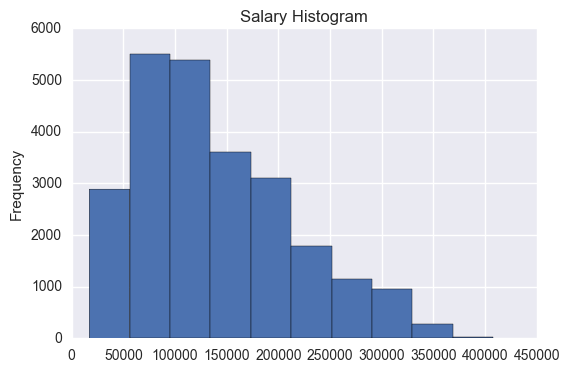

In [4]:
emp_retention['salary'].plot(kind ='hist',title= 'Salary Histogram')

In [5]:
emp_retention['salary'].describe()

count     24702.000000
mean     138183.345478
std       76058.184573
min       17000.000000
25%       79000.000000
50%      123000.000000
75%      187000.000000
max      408000.000000
Name: salary, dtype: float64

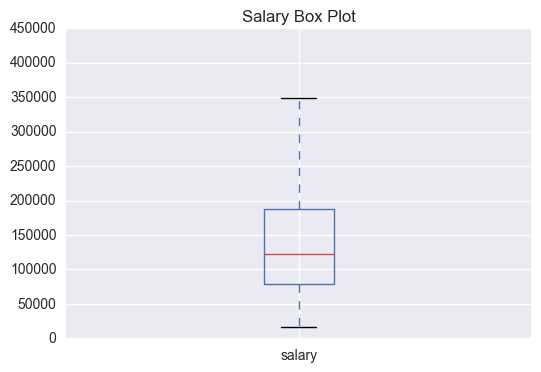

In [6]:
emp_retention['salary'].plot(kind='box',title ='Salary Box Plot')

## We can see that for the salary of all employees the mean is on the lower side.

Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

In [7]:
emp_retention['join_date'].min(),emp_retention['quit_date'].max()

('2011-01-24', '2015-12-09')

In [62]:
start = '2011-01-24'
end = '2015-12-13'

In [63]:
emp_retention['join_date']= pd.to_datetime(emp_retention['join_date'])
emp_retention['quit_date']= pd.to_datetime(emp_retention['quit_date'])

In [64]:
segmented_by_date = emp_retention[(emp_retention['join_date'] > start) &
              (emp_retention['quit_date'] < end)]

In [65]:
emp_retention.shape

(24702, 8)

In [66]:
segmented_by_date.shape

(13429, 8)

In [67]:
# so we've limited the values a bit, that's good!

In [68]:
emp_retention['employee_head_count'] = 1

In [160]:
seg_grouped = segmented_by_date.groupby(['quit_date','company_id']).count().reset_index()[['quit_date','company_id','employee_head_count']]

In [161]:
seg_grouped.head()

,quit_date,company_id,employee_head_count
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-28,4,1
3,2011-11-11,1,1
4,2011-11-22,1,1


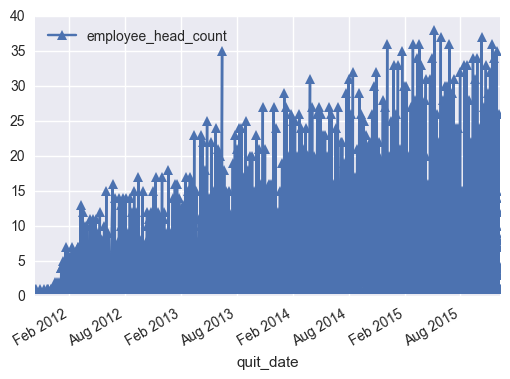

In [162]:
seg_grouped[['quit_date','employee_head_count']].plot(x='quit_date',
                                                      y='employee_head_count',marker = '^')

In [163]:
## lets assume for a while that this is okay...

In [164]:
emp_retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employee_head_count
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [165]:
joined_data = segmented_by_date.groupby(['join_date','company_id']).sum().reset_index()
quit_data = segmented_by_date.groupby(['quit_date','company_id']).sum().reset_index()

In [166]:
merged_data = pd.merge(joined_data,quit_data, on='company_id')

In [167]:
merged_data.head()

,join_date,company_id,employee_id_x,seniority_x,salary_x,employee_head_count_x,quit_date,employee_id_y,seniority_y,salary_y,employee_head_count_y
0,2011-01-25,1,941659.0,22,157000.0,2,2011-11-11,71407.0,19,107000.0,1
1,2011-01-25,1,941659.0,22,157000.0,2,2011-11-22,202573.0,10,199000.0,1
2,2011-01-25,1,941659.0,22,157000.0,2,2011-11-25,571350.0,7,119000.0,1
3,2011-01-25,1,941659.0,22,157000.0,2,2011-12-09,410589.0,14,208000.0,1
4,2011-01-25,1,941659.0,22,157000.0,2,2011-12-16,694726.0,5,70000.0,1


In [168]:
join_series  = merged_data['join_date']
unique_times = pd.DataFrame(join_series.append(merged_data['quit_date']).unique())

In [169]:
unique_companies = pd.DataFrame(merged_data['company_id'].unique())

In [170]:
unique_companies['key'] = 0
unique_times['key'] = 0
companies_and_times = pd.merge(unique_companies,unique_times, on = 'key')
companies_and_times.drop('key',1, inplace=True)

In [171]:
companies_and_times.columns = ['company_id','date']

In [172]:
companies_and_times.head()

,company_id,date
0,1,2011-01-25
1,1,2011-01-26
2,1,2011-01-31
3,1,2011-02-01
4,1,2011-02-02


In [173]:
data_headcount = pd.merge(companies_and_times,joined_data,left_on=['date','company_id'],right_on=['join_date','company_id'])
data_headcount_2 = pd.merge(data_headcount,quit_data,left_on=['date','company_id'],right_on=['quit_date','company_id'])

In [174]:
data_headcount_2.head()

,company_id,date,join_date,employee_id_x,seniority_x,salary_x,employee_head_count_x,quit_date,employee_id_y,seniority_y,salary_y,employee_head_count_y
0,1,2011-11-22,2011-11-22,927450.0,28,212000.0,1,2011-11-22,202573.0,10,199000.0,1
1,1,2012-01-03,2012-01-03,21443432.0,448,6141000.0,37,2012-01-03,212530.0,18,127000.0,1
2,1,2012-01-05,2012-01-05,678769.0,8,217000.0,1,2012-01-05,356783.0,15,128000.0,1
3,1,2012-01-09,2012-01-09,10359239.0,275,3310000.0,20,2012-01-09,391605.0,26,110000.0,1
4,1,2012-01-17,2012-01-17,13136562.0,371,4302000.0,29,2012-01-17,150032.0,5,164000.0,1


In [175]:
grouped_headcount=data_headcount_2.groupby(['company_id']).sum()

In [180]:
head_count_by_company =grouped_headcount['employee_head_count_x'] - grouped_headcount['employee_head_count_y']

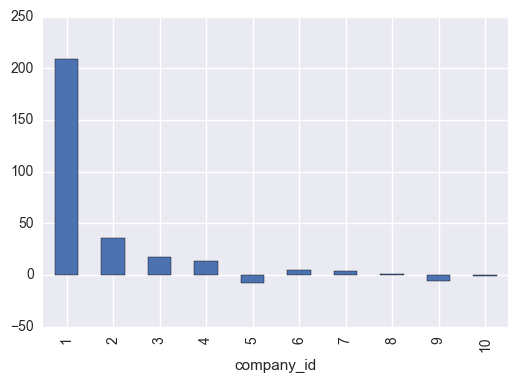

In [183]:
head_count_by_company.plot(kind ='bar')

## What are the main factors that drive employee churn? Do they make sense? Explain your findings.


The main factors of churn are going to be corelated by departmen segment, seniority, and salary. I would assume the department is consistent across the company.